In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df= pd.read_csv('titanic.csv')

In [3]:
#showing the first 5 rows of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#showing the rows and column in the data
rows,columns = df.shape
print(f'{rows=}\n{columns=}')

rows=891
columns=12


In [5]:
#showing the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data cleaning

In [6]:
#changing the index to the passengerid
df.set_index('PassengerId',inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
#checking for null values
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#removing unnecessary columns
df.drop(columns=['Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [10]:
#replacing the null value in age column with the average age
avg_age= df['Age'].mean().round(0)
df['Age']=df['Age'].fillna(avg_age)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
#filling null values in the cabin and embarked column with the most occuring value
mod_emb= df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mod_emb)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
#renaming the data in the survived column
df['Survived']= df['Survived'].astype(bool)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
#checking for distinct values
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
#changing the names
df['Embarked']=df['Embarked'].replace({'S':'Southampton','C':'Chercourg','Q':'Queenstown'})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Chercourg
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Southampton
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Southampton
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,Southampton


In [16]:
#statistical summary
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,30.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#changing the age column to an integer
df['Age']=df['Age'].round(0)
df['Age'].astype(int)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Chercourg
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton


# EDA

In [18]:
#Survival Distribution
dist_surv=df['Survived'].value_counts()
dist_surv

Survived
False    549
True     342
Name: count, dtype: int64

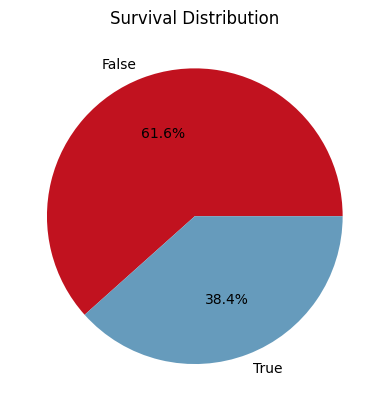

In [19]:
dist_surv.plot(kind='pie',autopct='%1.1f%%',colors=['#C1121F','#669BBC'])
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()

In [20]:
#ticket class distribution
dist_tick=df['Pclass'].value_counts().reset_index().sort_values(by='Pclass').reset_index(drop=True)
dist_tick

,Pclass,count
0,1,216
1,2,184
2,3,491


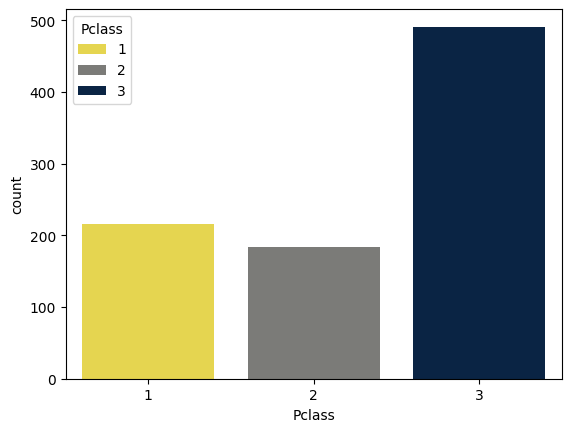

In [21]:
sns.barplot(data=dist_tick,x='Pclass',y='count',hue='Pclass',palette='cividis_r')
plt.show()

In [22]:
#gender distribution
dist_gend=df['Sex'].value_counts()
dist_gend

Sex
male      577
female    314
Name: count, dtype: int64

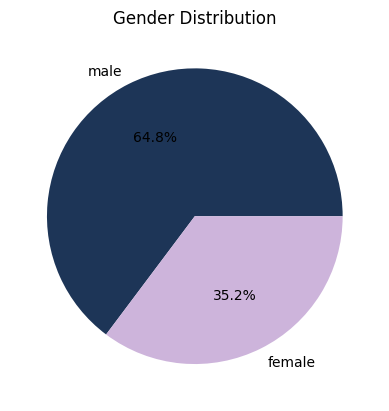

In [23]:
dist_gend.plot(kind='pie',autopct='%1.1f%%', colors=['#1d3557','#cdb4db'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In [24]:
#age distribution
df['Age'].value_counts()

Age
30.0    204
24.0     32
22.0     27
28.0     27
18.0     26
       ... 
53.0      1
66.0      1
80.0      1
0.0       1
74.0      1
Name: count, Length: 71, dtype: int64

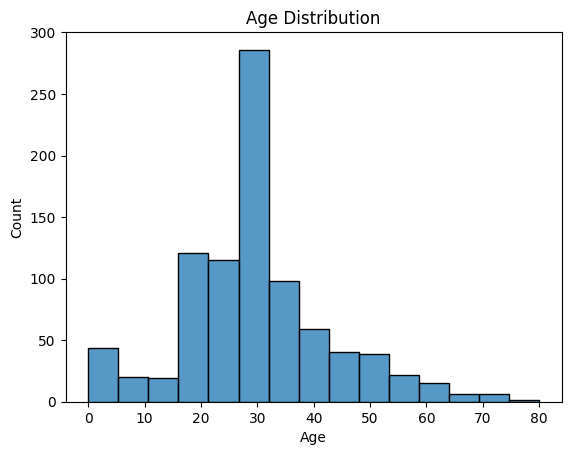

In [25]:
sns.histplot(data=df['Age'],bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [26]:
#Boarding location distribution
dist_emb=df['Embarked'].value_counts()
dist_emb

Embarked
Southampton    646
Chercourg      168
Queenstown      77
Name: count, dtype: int64

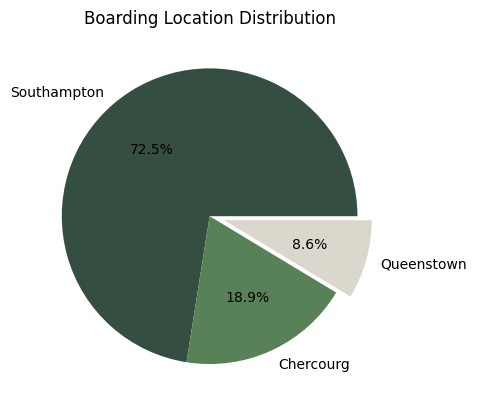

In [27]:
dist_emb.plot(kind='pie',autopct='%1.1f%%', explode=(0,0,0.1),colors=['#344E41','#588157','#DAD7CD'])
plt.title('Boarding Location Distribution')
plt.ylabel('')
plt.show()

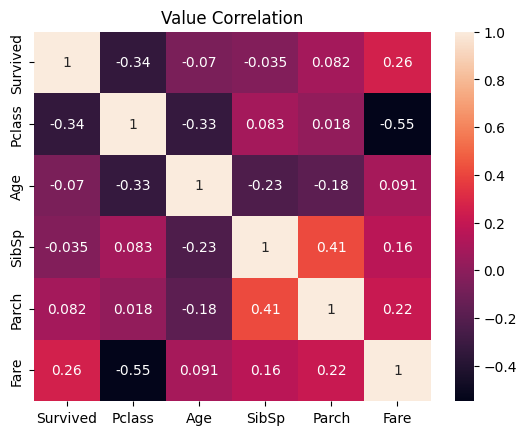

In [28]:
#correlation of values
sns.heatmap(data=df.corr(numeric_only=True),annot=True)
plt.title('Value Correlation')
plt.show()


In [29]:
print('Negative correlation between the transportation fare(Fare) and ticket class(Pclass)')
print('As the ticket class increases, thetransportation fare decreases')

Negative correlation between the transportation fare(Fare) and ticket class(Pclass)
As the ticket class increases, thetransportation fare decreases


In [30]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Chercourg
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Southampton
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Southampton
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,Southampton


In [31]:
#Survival by gender
pd.crosstab(index=df['Survived'], columns=df['Sex']).style.background_gradient('berlin')

Sex,female,male
Survived,,
False,81,468
True,233,109


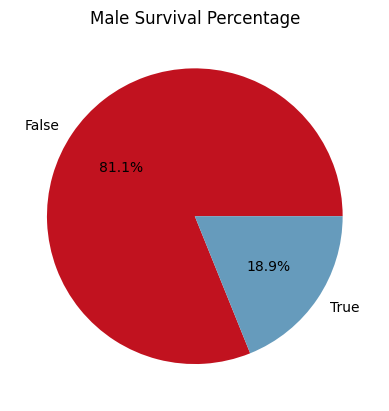

In [32]:
#male survival percentage
df_sex = df[['Survived','Sex']].copy()
df_sex.query('Sex == "male"')['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['#C1121F','#669BBC'])
plt.title('Male Survival Percentage')
plt.ylabel('')
plt.show()

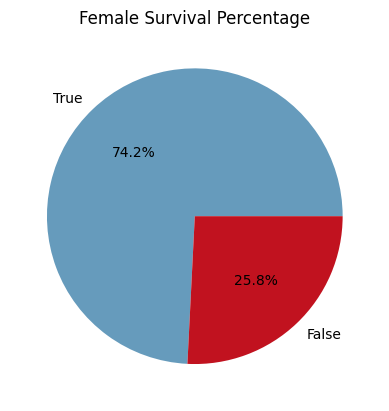

In [33]:
#female survival percentage
df_sex.query('Sex == "female"')['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['#669BBC','#C1121F'])
plt.title('Female Survival Percentage')
plt.ylabel('')
plt.show()

In [34]:
#Survival by Ticket Class
pd.crosstab(index=df['Survived'], columns=df['Pclass']).style.background_gradient('Greens',axis='columns')

Pclass,1,2,3
Survived,,,
False,80,97,372
True,136,87,119


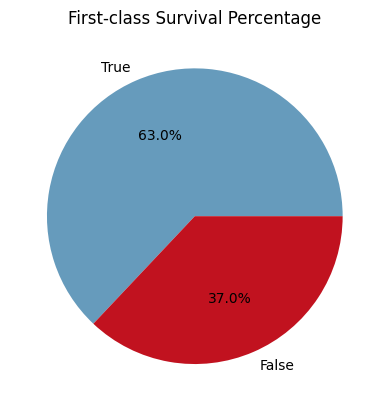

In [35]:
df_class = df[['Survived','Pclass']].copy()
df_class.query('Pclass == 1')['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['#669BBC','#C1121F'])
plt.title('First-class Survival Percentage')
plt.ylabel('')
plt.show()

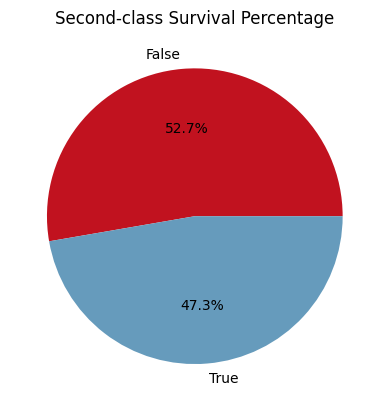

In [36]:
df_class = df[['Survived','Pclass']].copy()
df_class.query('Pclass == 2')['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['#C1121F','#669BBC'])
plt.title('Second-class Survival Percentage')
plt.ylabel('')
plt.show()

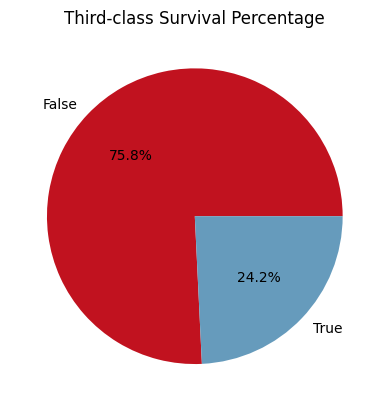

In [37]:
df_class = df[['Survived','Pclass']].copy()
df_class.query('Pclass == 3')['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['#C1121F','#669BBC'])
plt.title('Third-class Survival Percentage')
plt.ylabel('')
plt.show()

In [38]:
# survival vs Age group
df_age = df[['Survived','Age']].copy()
df_age['Age']= df_age['Age'].astype(int)
def age_fxn(age):
    if age < 20 :
        return 'Children'
    if (age >= 20) & (age < 50) :
        return 'Adult'
    if age >= 50 : 
        return 'Elderly'
df_age['Age_group']=df_age['Age'].apply(age_fxn)
df_age

,Survived,Age,Age_group
PassengerId,,,
1,False,22,Adult
2,True,38,Adult
3,True,26,Adult
4,True,35,Adult
5,False,35,Adult
...,...,...,...
887,False,27,Adult
888,True,19,Children
889,False,30,Adult


In [39]:
pd.crosstab(index=df_age['Survived'], columns=df_age['Age_group'], margins=True)

Age_group,Adult,Children,Elderly,All
Survived,,,,
False,417,85,47,549
True,236,79,27,342
All,653,164,74,891


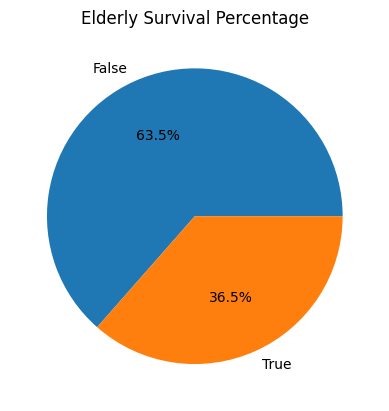

In [40]:
adult_df=df_age.query('Age_group == "Elderly"')
adult_df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Elderly Survival Percentage')
plt.ylabel('')
plt.show()

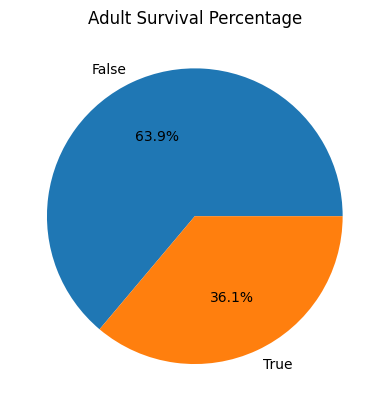

In [41]:
adult_df=df_age.query('Age_group == "Adult"')
adult_df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Adult Survival Percentage')
plt.ylabel('')
plt.show()

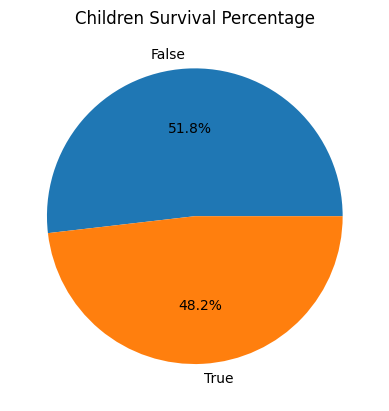

In [42]:
adult_df=df_age.query('Age_group == "Children"')
adult_df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Children Survival Percentage')
plt.ylabel('')
plt.show()

In [43]:
# top 5 people that paid the highest transportation fare and where the enbarked from
df[['Name','Fare','Embarked']].sort_values(by='Fare',ascending= False).head()

,Name,Fare,Embarked
PassengerId,,,
259,"Ward, Miss. Anna",512.3292,Chercourg
738,"Lesurer, Mr. Gustave J",512.3292,Chercourg
680,"Cardeza, Mr. Thomas Drake Martinez",512.3292,Chercourg
89,"Fortune, Miss. Mabel Helen",263.0000,Southampton
28,"Fortune, Mr. Charles Alexander",263.0000,Southampton


In [ ]:
print('OVERALL INSIGHTS')
print('* Women and children had a significantly higher survival rate compared to men')
print('* 1st class passengers had a higher survival rate followed by second class and 3rd class')